McsPyDataTools Tutorial<a id='Top'></a>
=======================

- <a href='#D and I'>Downloading and installing</a>
---------------------------------------------------
- <a href='#Mcs-HDF5'>Structure of the Mcs-HDF5 file</a>
--------------------------------------------------------
- <a href='#McsData Module'>McsData Classes and Inheritance</a>
-------------------------------------------------------------------------------------------
 - ### <a href='#RD'>RawData</a> 
 - ### <a href='#R'>Recording</a> 
 - ### <a href='#S'>Stream</a>
 - ### <a href='#I'>Info</a> 
  
- <a href='#Accessing your Data with McsData'>Accessing your Data with McsData</a>
----------------------------------------------------------------------------------
 - ### <a href='#Req'>Requirements</a>
 - ### <a href='#AS'>AnalogStream</a>
 - ### <a href='#FS'>FrameStream</a>
 - ### <a href='#ES'>EventStream</a>
 - ### <a href='#SS'>SegmentStream</a>
  - #### <a href='#SC'>Subtype: Cutouts</a>
  - #### <a href='#SA'>Subtype: Averages</a>
 - ### <a href='#TS'>TimestampStream</a>
 - ### <a href='#I2'>Info</a>

   
- <a href='#Accessing your Data with McsCMOS'>Accessing your Data with McsCMOS</a>
---------------------------------------------------------------------------------- 
 - ### <a href='#CD'>CMOSData</a>


Downloading and installing<a id='D and I'></a>
----------------------------------------------

Open a console or terminal and

### - With pip or setuptools

type:

    pip install McsPyDataTools
    
Or if you have setuptools installed type:

    easy_install McsPyDataTools
    

If this doesn't yield the expected result, download the file from:

http://download.multichannelsystems.com/download_data/software/multi_channel_suite/datamanager/McsPyDataTools-0.2.1.zip

From here there are 4 possible ways to get the module working.


### - Manually(while packed)
 
Go to your Downloads folder and run:
    
    pip install McsPyDataTools-0.2.1.zip   
    
Or if you have setuptools installed:

    easy_install McsPyDataTools-0.2.1.zip   
    

If the methods above fail, unpack the .zip file.

### - Manually(when unpacked) I

Go to the folder you unpacked the module to and run:
    
    pip install McsPyDataTools-0.2.1
    
Or if you have setuptools installed:

    easy_install McsPyDataTools-0.2.1
    
    
### - Manually(when unpacked) II

Go to the folder you unpacked the module to, go to the McsPyDataTools_0.2.1 folder and run the **setup.py** file from inside the folder

    python setup.py install
    

If either of the above worked there will be an **McsPyDataTools-0.2.1-py2.7.egg** in the site_package folder aswell as an **McsPyDataTools.py** and a **PlotExperimentData.py** script in the Scripts folder of your Python installation.
    
    
### - Manually(when unpacked) III

If the other ways fail or you are still unable to import the module into a python script, you can manually place the **McsData.py** and **McsCMOS.py** scripts from the McsPyDataTools folder in the **\site-packages** folder of your Python installation.

Note that the folder containing your Python installation might be hidden.

This last option will only make the classes availible needed to analyze HDF5 files. Any other scripts, like the **DataStreamInfo.py** or the **McsDataTools.py** script, which should get installed to the **/Scripts** folder of your python installation, are best copied into a seperate folder.

### Data

This notebook relies on some files which hold the data for the examples. These are quiet large and would exceed the repositories size limt. Therefor the files can be separately downloaded here:


# DOWNLOADLINK  FÜR DATEN HIER EINFÜGEN 


<a href='#Top'>Back to index</a>

Structure of the Mcs-HDF5 file<a id='Mcs-HDF5'></a>
---------------------------------------------------

With the included **DataStreamInfo.py** script,  a first look can be taken at what the HDF5 file contains.

The information about the data within the file can be viewed by calling the **DataStreamInfo.py** script from the console and handing over the exact file-path with the argument for directory and filepath: **-f**


    X:\...\python DataStreamInfo.py -f "X:\Data\Experiment_231\2014-07-09T10-17-35W8 Standard all 500 Hz.h5" 
    
If the desired file is in the same folder as **DataStreamInfo.py**, you might want to consider copying this script to your datafolder, **--f + "Filename"** can be used:

    X:\...\python DataStreamInfo.py --f "2014-07-09T10-17-35W8 Standard all 500 Hz.h5"
    
A tabel like this will appear:

    2014-07-09T10-17-35W8 Standard all 500 Hz.h5

    Date                 Program                     Version
    -------------------  --------------------------  ---------
    2014-07-09 10:17:35  Multi Channel Experimenter  0.9.8.2
    
    Type       Stream                                   # ch
    ---------  ---------------------------------------  ------
    Analog     Filter (1) Filter Data                   8
    Analog     Data Acquisition (1) Electrode Raw Data  8
    Analog     Data Acquisition (1) Digital Data        1
    Event      Digital Events 1
    Segment    Spike Detector (1) Spike Data
    TimeStamp  Spike Detector (1) Spike Timestamps
    
It holds information about the **Date** of the recording, the **Program** which was used as well as its **Version**. Also included is a list of **Streams** and additional information concerning these. Streams can be seen as containers of information of a certain type.

<a href='#Top'>Back to index</a>

McsData Classes and Inheritance <a id='McsData Module'></a>
---------------------------------------------------------------------------------------

This is a graphical representation of the classes and their content which may be found in an HDF5 file produced by Mcs apparatuses.

<img src="./Hierarchy_short.png">

Additional information about the membermethods of each class can be found in **McsData.py** or the module description file.

We also highly recomend the use of the HDF Groups **HDFView** software to help visualize and understand the structure of HDF5 files. This can make accessing the data **MUCH** easier.

<a href='#Top'>Back to index</a>

### RawData  <a id='RD'></a>

As the docstrings of the class already imply, this class was designed to hold the information of a complete MCS raw data file. 

Upon initialization with the path to your rawdata

```python
    rawdata = RawData('path to your rawdata')
```

membermethods of this class will check if the provided file meets the version requirements to be further processesed. This is neccessary, as not only the way how Mcs programs handle the HDF5 formated files may change but the fileformat itself can undergo changes.

```python
    self.__validate_mcs_hdf5_version()
```

Afterwards all information about the data stored in the file is retrieved.

```python
    self.__get_session_info()
```

When needed all recordings from the rawdata file are read by

```python
    self.__read_recordings()
```

This generates a dictionary with the number of the recordings as keys, Recording\_**0**, Recording\_**1**, etc. and the values as members of the Recording class with the correspondigng data. This will be important when we will discuss the possibility of iterating over all datasets within one group.

<a href='#Top'>Back to index</a>

### Recording  <a id='R'></a>

The Recording class can be seen as a container for all the data gathered in one recording.

```python
    class RawData(object):
    
        ...
        
        self.__recordings[int(recording_name[1])] = Recording(value)
```

Upon initialization the values extracted by the RawData class got asigned to it.

```python
    class Recording(object):
    
        ...
        
        self.__recording_grp = recording_grp  # recording_grp = value
```
Later on these can be further decomposed by the membermethods of this class into the different subtypes/children of the Stream class.

```python
    self.__read_analog_streams()
    self.__read_frame_streams()
    self.__read_event_streams()
    self.__read_segment_streams()
    self.__read_timestamp_streams()
```     
    
The data of the streams gets assigned in a similar fashion as seen before with the recordings

```python
    class Recording(object):

        ...
        
        if 'AnalogStream' in self.__recording_grp:
            
            ...
        
            self.__analog_streams[int(stream_name[1])] = AnalogStream(value)
        
    
    
    class AnalogStream(Stream):
    
        ...
        
        Stream.__init__(self, stream_grp, "AnalogStreamInfoVersion")  # stream_grp = value
```

Due to this internal structure of classes and subclasses, beeing only created when addressed, only smal portions of the data ever get loaded at any time, making the access and the computation of those values so fast.

<a href='#Top'>Back to index</a>

### Stream <a id='S'></a>

The Stream class is the base class from which all stream types inherit. All describing metadata of the stream is read here.

Currently the following types exist:
 - AnalogStream
 - FrameStream
 - EventStream
 - SegmentStream
 - TimeStampStream
 
These streams can be further split up into single entityies of the corresponding type. So FrameStream can habour several FrameEntities. These Entities finaly hold the data which, once addressed, can be viewed, manipulated and/or visualized.

Additional information about the classes can be found in the html-Documentation.

<a href='#Top'>Back to index</a>

### Info <a id='I'></a>

Additionally to the Stream classes, there is the Info class.
This is the parent class of all Info child classes that exist for the different Stream types. Info that gets stored can be timerange of ticks, units of readings, experiment specific information about dilutions, sensor id, filtersettings, etc..

<a href='#Top'>Back to index</a>

## Accessing your Data with McsData<a id='Accessing your Data with McsData'></a>

Now that the mechanism of reading data from an HDF5 file with the classes included in the McsData module is clear we can walk through some quick and easy examples of how to access and visualize your data.

### Requirements <a id='Req'></a>

First some modules need to be imported.

In [1]:
# These are the imports of the McsData module
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_

# matplotlib.pyplot will be used in these examples to generate the plots visualizing the data
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.widgets import Slider
# These adjustments only need to be made so that the plot gets displayed inside the notebook
%matplotlib inline
# %config InlineBackend.figure_formats = {'png', 'retina'}

# numpy is numpy ...
import numpy as np

# bokeh adds more interactivity to the plots within notebooks. Adds toolbar at the top-right corner of the plot.
# Allows zooming, panning and saving of the plot
import bokeh.io
import bokeh.mpl
import bokeh.plotting

Sometimes running Python applications in the background can interfere with the functionalities of this notebook. To make sure that all plots are created correctly you are best advised to exit any other Python related processes.

<a href='#Top'>Back to index</a>

### AnalogStream<a id='AS'></a>

Next we need to access the rawdata by initializing an instance of the RawData class from the McsData module by handing over the path to the file.

In [2]:
channel_raw_data = McsPy.McsData.RawData('.\\TestData\\2014-07-09T10-17-35W8 Standard all 500 Hz.h5')

The filepath points to the folder TestData within the folder, where this notebook resides.

To check if we got acces to the file we can look at its contents by printing the info that got extracted when the RawData object was initialized. This is just for demonstrational purposes and does not need to be made every time data is accessed.

In [3]:
print channel_raw_data.comment
print channel_raw_data.date
print channel_raw_data.clr_date
print channel_raw_data.date_in_clr_ticks
print channel_raw_data.file_guid
print channel_raw_data.mea_name
print channel_raw_data.mea_sn
print channel_raw_data.mea_layout
print channel_raw_data.program_name
print channel_raw_data.program_version


2014-07-09 10:17:35.172098
Mittwoch, 9. Juli 2014
635404978551720981
700b3ec2-d406-4943-bcef-79d73f0ac4d3
Linear8

Linear8
Multi Channel Experimenter
0.9.8.2


In [4]:
print channel_raw_data.recordings

(u'Recording_0', <HDF5 group "/Data/Recording_0" (4 members)>)
{0: <McsPy.McsData.Recording object at 0x0000000003665908>}


In [5]:
print channel_raw_data.recordings[0].analog_streams

(u'Stream_0', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_0" (3 members)>)
(u'ChannelData', <HDF5 dataset "ChannelData": shape (8, 9850), type "<i4">)
(u'ChannelDataTimeStamps', <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">)
(u'InfoChannel', <HDF5 dataset "InfoChannel": shape (8,), type "|V100">)
(u'Stream_1', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_1" (3 members)>)
(u'ChannelData', <HDF5 dataset "ChannelData": shape (8, 9800), type "<i4">)
(u'ChannelDataTimeStamps', <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">)
(u'InfoChannel', <HDF5 dataset "InfoChannel": shape (8,), type "|V100">)
(u'Stream_2', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_2" (3 members)>)
(u'ChannelData', <HDF5 dataset "ChannelData": shape (1, 9800), type "<i4">)
(u'ChannelDataTimeStamps', <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">)
(u'InfoChannel', <HDF5 dataset "InfoChannel": shape (1,), type "|V100">)
{0: <McsPy.McsData.AnalogStr

Additionally, the indices or IDs of the included datastructures can be addressed by calling **.keys()** on the HDF5 groups. This is due to the fact that inside of McsData, upon initialization of the different datastructure-types, dictionaries are created with IDs as keys and values of the data as values.

This will become more important later in this tutorial when the procedure of iterating over all data of one stream is displayed.

In [6]:
print channel_raw_data.recordings.keys()

[0]


So we see that there is one Recording within the rawdata with index 0,

In [7]:
print channel_raw_data.recordings[0].analog_streams.keys()

[0, 1, 2]


and it includes 3 AnalogStreams at inedx 0,1 and 2

    (u'Stream_0', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_0" (3 members)>)
    (u'Stream_1', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_1" (3 members)>)
    (u'Stream_2', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_2" (3 members)>)

From looking at the file with **DataStreamInfo.py** we know what these streams are.

    Type       Stream                                   # ch
    ---------  ---------------------------------------  ------
    Analog     Filter (1) Filter Data                   8      <----- Index: 0
    Analog     Data Acquisition (1) Electrode Raw Data  8
    Analog     Data Acquisition (1) Digital Data        1


So the first of the three streams is addressed like:


In [8]:
analog_stream_0 = channel_raw_data.recordings[0].analog_streams[0]

The data of the stream can be found under **.channel_data**. It is only now that the actual values from the data get accessed. Before this step, we only navigated through pointers of sorts containing information leading to the data. This behavior makes working with HDF5 so efficient.

In [9]:
analog_stream_0_data = analog_stream_0.channel_data

print analog_stream_0_data

<HDF5 dataset "ChannelData": shape (8, 9850), type "<i4">


By rearanging the dimensions of the data-array with the numpy function **transpose()** it's dimensions are more suitable for plotting. 

In [10]:
np_analog_stream_0_data = np.transpose(analog_stream_0_data)

print "Old shape:", analog_stream_0_data.shape
print "New shape:", np_analog_stream_0_data.shape
print
print np_analog_stream_0_data

Old shape: (8, 9850)
New shape: (9850L, 8L)

[[-2 -1  0 ..., -5  0  2]
 [ 3 -1 -4 ...,  2  5 -2]
 [-2  5  2 ..., -1 -4  0]
 ..., 
 [ 7  0 -2 ...,  0  4  6]
 [-5 -2 -2 ...,  0 -3 -8]
 [ 0  3  7 ...,  0  8  2]]


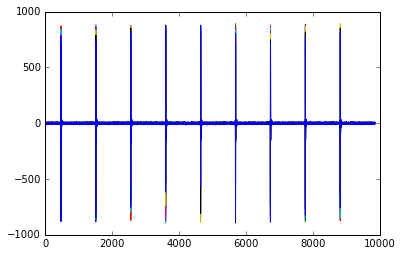

In [11]:
plt.plot(np_analog_stream_0_data)

plt.show()

Refined plots with added lables and title might look like this

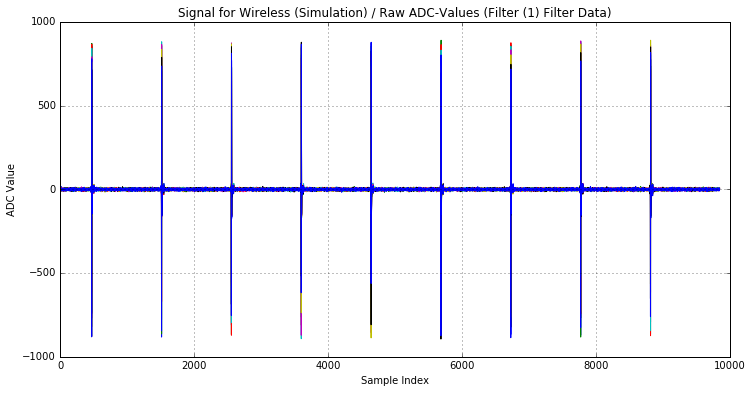

In [12]:
plt.figure(figsize=(12,6))
plt.plot(np_analog_stream_0_data)
plt.title('Signal for Wireless (Simulation) / Raw ADC-Values (%s)' % analog_stream_0.label)
plt.xlabel('Sample Index')
plt.ylabel('ADC Value')
plt.grid()

plt.show()

If you want to look at certain portions of the data this can be achieved by specifying a range when accessing it.

To specify a range it helps to know the shape of your data. 

In [13]:
np_analog_stream_0_data = np.transpose(channel_raw_data.recordings[0].analog_streams[0].channel_data)

print np_analog_stream_0_data.shape

(9850L, 8L)


So it seems that this data-array has 9850 rows and 8 columns. 

Let's look at **rows 4400 to 4800** in **columns 4 to 7**. Notice that in the HDF5 file rows and colums are swapped. As python doesn't include the last item in range we have to add 1 to both ranges.

In [14]:
np_data_range = np_analog_stream_0_data[4500:4801, 4:8]  

print np_data_range

[[ 0  5 -2  5]
 [ 0  0  1  1]
 [-6 -2  0 -2]
 ..., 
 [-2  0 -9  0]
 [ 0 -1  5  4]
 [-5  5 -2 -4]]


And then just plot!

In [15]:
bokeh.io.output_notebook()  # see comment for bokeh module in "Requirements" section

plt.figure(figsize=(12,6))
plt.plot(np_data_range)
plt.title('Signal for Wireless (Simulation) / Raw ADC-Values (%s)' % analog_stream_0.label)
plt.xlabel('Sample Index')
plt.ylabel('ADC Value')
plt.grid()

bokeh.plotting.show(bokeh.mpl.to_bokeh())

Loading BokehJS ...

Of course other plot-types can be used if desired. 


#### Draw channel with spectogram:

With the values from the second AnalogStream, 

    Type       Stream                                   # ch
    ---------  ---------------------------------------  ------
    Analog     Filter (1) Filter Data                   8
    Analog     Data Acquisition (1) Electrode Raw Data  8      <------   
    Analog     Data Acquisition (1) Digital Data        1
    Event      Digital Events 1
    Segment    Spike Detector (1) Spike Data
    TimeStamp  Spike Detector (1) Spike Timestamps

With **.get_channel_in_range(channel_id, index_start, index_end)** and **.get_channel_sample_timestamps(channel_id, index_start, index_end)** we can define a range of data and timestamps, from **index_start** to **index_end** for a specific channel with **channel_id** that we want to analyze/plot.

However, **.get_channel_sample_timestamps(channel_id, index_start, index_end)** rather than grabbing an existing data set, calculates timestamps from the **Tick** value from the InfoChannel structure of the Stream and the provided range. Also using the functions above the data internally is rearanged so no need to use any additional numpy functions here. 

The channel_IDs can be accquired by calling **.keys()** on the channel_infos of the respective stream.

In [16]:
channel_ids = channel_raw_data.recordings[0].analog_streams[1].channel_infos.keys()

print channel_ids

[0, 1, 2, 3, 4, 5, 6, 7]


So there are 8 channels within the stream. We take the key at index [0]. Sure this example looks a bit like overkill, but when iterating over multiple channels, this can be a way to go.

In [17]:
channel_id = channel_raw_data.recordings[0].analog_streams[1].channel_infos.keys()[0]

Additional information can be accessed through **.info** on **.channel_infos[id]**

In [18]:
print channel_raw_data.recordings[0].analog_streams[1].channel_infos[0].info

{'HighPassFilterCutOffFrequency': '-1', 'Exponent': -9, 'LowPassFilterType': '', 'LowPassFilterOrder': -1, 'RowIndex': 0, 'RawDataType': 'Int', 'ChannelID': 0, 'LowPassFilterCutOffFrequency': '-1', 'Label': 'E1', 'HighPassFilterOrder': -1, 'HighPassFilterType': '', 'ADZero': 0, 'ConversionFactor': 381470, 'Tick': 2000, 'GroupID': 0, 'Unit': 'V'}


Back to the plot. Grab the stream and the corresponding timestamps

In [19]:
stream = channel_raw_data.recordings[0].analog_streams[1]
time = stream.get_channel_sample_timestamps(channel_id, 0, 10000)

Next we recalculte the values saved in the **time** variable to seconds with the included ureg function from the McsData module and extract the data of the desired channel with its ID and a range(0 to 10000)

In [20]:
# scale time to seconds:
scale_factor_for_second = Q_(1,time[1]).to(ureg.s).magnitude
time_in_sec = time[0] * scale_factor_for_second

signal = stream.get_channel_in_range(channel_id, 0, 10000)
print "Signal: ",signal

Signal:  (array([-0.00343323,  0.00228882, -0.00419617, ...,  0.00991822,
        0.00724793,  0.00686646]), <Unit('volt')>)


To plot the spectogram of the data we also need to get the sampling frequency. For more information about metainformation of streams and data see the chapter <a href='#I2'>Info</a>.

In [21]:
sampling_frequency = stream.channel_infos[channel_id].sampling_frequency.magnitude 

And then plot!

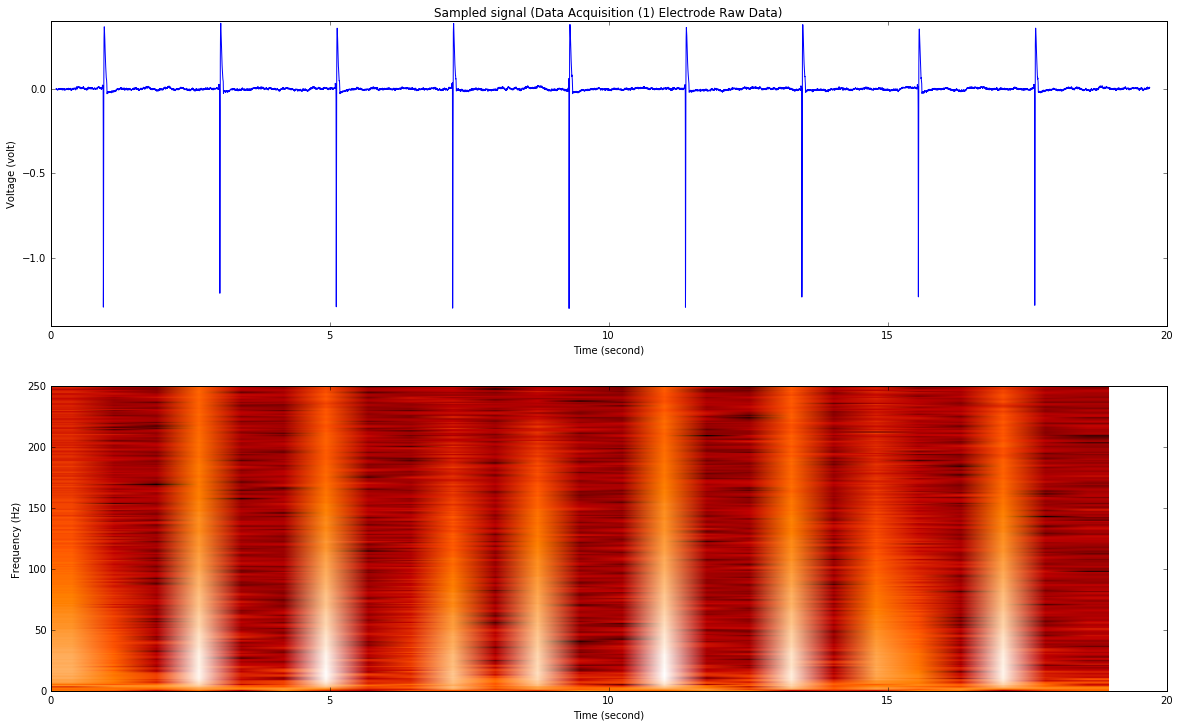

In [22]:
plt.figure(figsize=(20,12))

# Plot time domain
axtp = plt.subplot(211)
plt.plot(time_in_sec, signal[0])
plt.xlabel('Time (%s)' % ureg.s)
plt.ylabel('Voltage (%s)' % signal[1])
plt.title('Sampled signal (%s)' % stream.label)

# Plot frequency domain
plt.subplot(212)
plt.specgram(signal[0], NFFT=512, noverlap = 128, Fs = sampling_frequency, cmap = plt.cm.gist_heat, scale_by_freq = False)
plt.xlabel('Time (%s)' % ureg.s)
plt.ylabel('Frequency (Hz)')
plt.show()



#### Compare multiple streams:

To compare multiple streams they can also be plotted in one figure. 


In [23]:
bokeh.io.output_notebook()

# Assigning data
stream1 = channel_raw_data.recordings[0].analog_streams[0]
stream2 = channel_raw_data.recordings[0].analog_streams[1]
channel_id = channel_raw_data.recordings[0].analog_streams[1].channel_infos.keys()[0]

# Defining range
time1 = stream1.get_channel_sample_timestamps(channel_id,0,3000)
signal1 = stream1.get_channel_in_range(channel_id,0,3000)
time2 = stream2.get_channel_sample_timestamps(channel_id,0,3000)
signal2 = stream2.get_channel_in_range(channel_id,0,3000)

# Plot
plt.figure(figsize=(12,6))
plt.plot(time1[0], signal1[0])
plt.plot(time2[0], signal2[0])
plt.xlabel('Time (%s)' % time1[1])
plt.ylabel('Voltage (%s)' % signal1[1])
plt.suptitle('Sampled signal overlay \'%s\' and \'%s\'' % (stream1.label, stream2.label), fontsize=12)

bokeh.plotting.show(bokeh.mpl.to_bokeh())

Loading BokehJS ...


#### Heatmap of activity:

Heatmaps are another way of displaying raw data like it's stored in AnalogStream_1. 

In this example all data from all channels are accessed by calling **.channel_data[:, 0:10000]**.

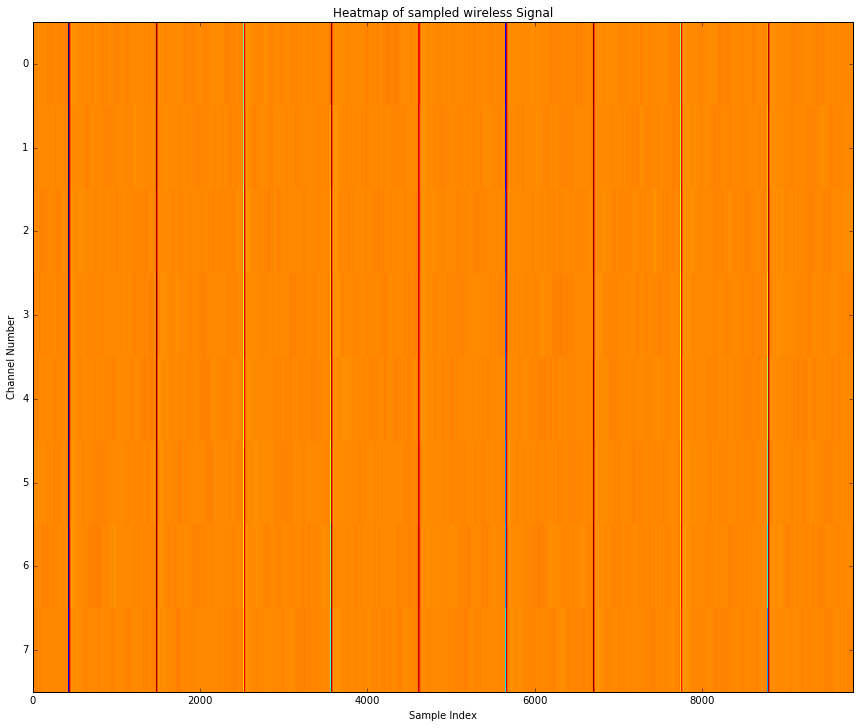

In [24]:
data = channel_raw_data.recordings[0].analog_streams[1].channel_data[:, 0:10000]
aspect_ratio = 1000

plt.figure(figsize=(20,12))
plt.set_cmap("jet")
plt.imshow(data, interpolation='nearest', aspect=aspect_ratio)
plt.xlabel('Sample Index')
plt.ylabel('Channel Number')
plt.title('Heatmap of sampled wireless Signal')
plt.show()

 <a href='#Top'>Back to index</a>

### FrameStream<a id='FS'></a>

FrameStreams are a representation of the signals recorded by the chip of a CMOS-MEA system. 

The following examples demonstrate how to access all or just some of the data in respect to sensor position on the CMOS chip or timeframe of interest.

We start of by setting the raw_data to an HDF5 file containing some FrameStream data.


In [25]:
frame_raw_data = McsPy.McsData.RawData('.\\TestData\\Retina.h5')

print frame_raw_data.recordings[0].frame_streams[0]

(u'Recording_0', <HDF5 group "/Data/Recording_0" (1 members)>)
(u'Stream_0', <HDF5 group "/Data/Recording_0/FrameStream/Stream_0" (2 members)>)
(u'FrameDataEntity_0', <HDF5 group "/Data/Recording_0/FrameStream/Stream_0/FrameDataEntity_0" (3 members)>)
(u'InfoFrame', <HDF5 dataset "InfoFrame": shape (1,), type "|V132">)


We can see that we have one Stream with data included in our FrameStream and inside of that we have one FrameDataEntity which holds Data:

    'Stream_0'
    ->'FrameDataEntity_0'
    
For FrameStreams the ID instead of the index has to be taken when accessing the data of an entity. Just like in the example for AnalofStreams we can look at the IDs by calling **.keys()** on all entities.

In [26]:
print frame_raw_data.recordings[0].frame_streams[0].frame_entity.keys()

[1]


With **info.info** additional info can be accessed of the desired entity (frame_entity[1]).

In [27]:
print frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info

{'FrameLeft': 1, 'Exponent': -9, 'RawDataType': 'Short', 'LowPassFilterCutOffFrequency': '-1', 'Label': 'ROI 1', 'FrameTop': 1, 'ADZero': 0, 'LowPassFilterOrder': -1, 'ReferenceFrameTop': 1, 'FrameRight': 65, 'HighPassFilterType': '', 'Tick': 50, 'SensorSpacing': 1, 'HighPassFilterCutOffFrequency': '-1', 'FrameDataID': 0, 'ADCBits': 16, 'FrameID': 1, 'GroupID': 1, 'ReferenceFrameRight': 65, 'ReferenceFrameBottom': 65, 'LowPassFilterType': '', 'HighPassFilterOrder': -1, 'ReferenceFrameLeft': 1, 'FrameBottom': 65, 'Unit': 'V'}


Keys of the dictionary can ebe used to acces the values like this:

In [28]:
print frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info['Unit']

V


Of course the values aren't in Volt but the unit has to be adjusted with the 'Exponent'.

In [29]:
print frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info['Exponent']

-9


The following code shows how the data and specific parts of it can be accessed by using **.data** and handing over a range of rows, columns, and frames.

All rows and all columns of the first frame are: 
    
    .data[:,:,0]

In [30]:
frame_data = frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].data

first_frame = frame_data[:,:,0]

sensor_calc = str(len(first_frame))+" * "+str(len(first_frame[0]))+" = "+str(len(first_frame)*len(first_frame[0]))

print frame_data
print
print "Each \"frame\" contains: ",sensor_calc," data points."
print "Each point represents the value of one sensor of the CMOS-chip at a given timepoint."
print "This FrameStream consists of 20000 frames."
print 
print "Array of the data contained in the first frame of the stream.\n",first_frame

<HDF5 dataset "FrameData": shape (65, 65, 20000), type "<i2">

Each "frame" contains:  65 * 65 = 4225  data points.
Each point represents the value of one sensor of the CMOS-chip at a given timepoint.
This FrameStream consists of 20000 frames.

Array of the data contained in the first frame of the stream.
[[   2  -70  -57 ...,   -1   12  -28]
 [ -12   -1  -37 ...,   20  -17  -23]
 [ -13  -37  -22 ...,   21   23  -83]
 ..., 
 [ -11  -14  -28 ...,  -23   -6    4]
 [   9  -29  -16 ...,   16 -162    2]
 [  12 -110  -43 ...,  -32   -6   -2]]


Plot of a single frame (the first 65\*65 frame, index 0) could look like this:

Additionally to the data we need some conversion factors to adjust the values for each sensor.

In [31]:
conv_fact = np.array(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.conversion_factors)

print conv_fact

[[1125 1591 1613 ..., 1507 1475 1481]
 [1119 1589 1610 ..., 1513 1469 1483]
 [1127 1606 1624 ..., 1517 1477 1496]
 ..., 
 [1686 1726 1663 ..., 1628 1629 1776]
 [1832 1624 1870 ..., 1619 1519 1773]
 [1811 1630 1763 ..., 1614 1150 1862]]


Thanks to numpy's internals it is able to multiply two arrays of the same dimension like R would.

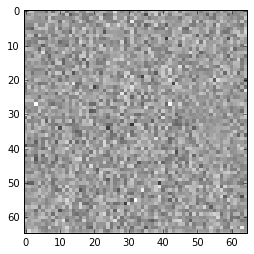

In [32]:
f_data = np.array(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].data[:,:,0])*conv_fact
plt.set_cmap("Greys") # change colors used by plot
plt.imshow(f_data, interpolation='none',vmin=-350000, vmax=350000)

Example of subplotted frames with defined frame interval:

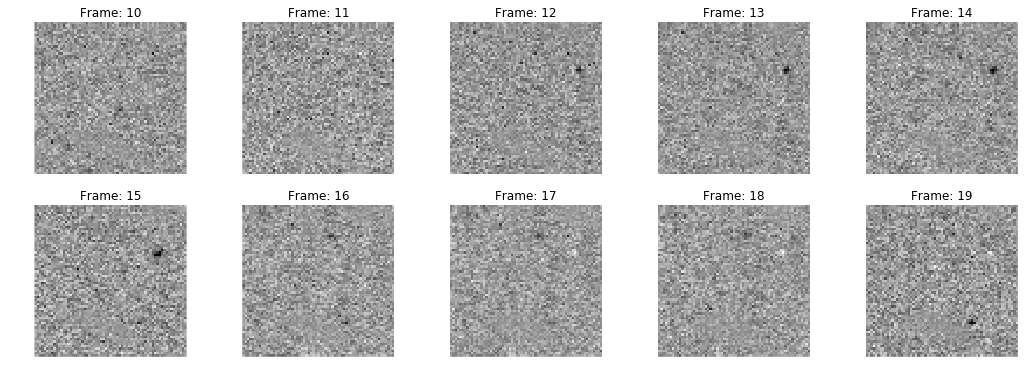

In [33]:
fig, ((ax1, ax2, ax3, ax4, ax5), ( ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, sharex='col', sharey='row')
fig.set_size_inches(18,6)
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in xrange(10,20):
    current_frame = np.transpose(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].data[:,:,i*1])*conv_fact
    ax_list[i-10].imshow(current_frame, interpolation='none', vmin=-350000, vmax=350000)
    ax_list[i-10].set_axis_off()
    ax_list[i-10].set_title("Frame: "+str(i*1))
    
plt.show()    

Example of interactive plot of a FrameStream within a certain timeframe:

With the slider the Timepoint that gets plotted can be defined. This value is handed over to the **make_plot** function. The interactive ipywidgets slider only works with jupyter notebooks but simmilar functionalities can be created with  matplotlib.widgets or by using graphical modules for python like Tkinter in regular python scripts/apps.

Plot may "flicker", known ipywidgets.interact problem.

<function __main__.make_plot>

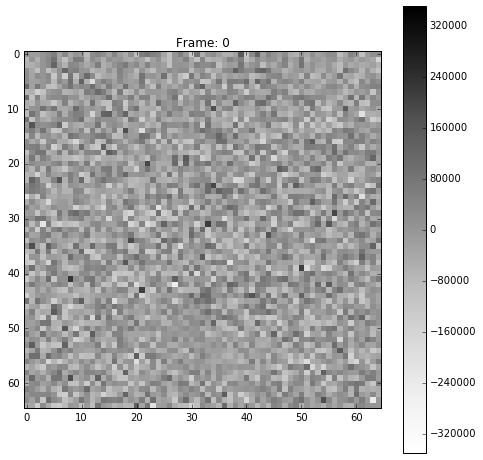

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, HTML

fig = plt.figure(figsize=(8,8))
plt.set_cmap("Greys")  # change colors used by plot

def make_plot(Frame=0):
    
    ffig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.set_title("Frame: "+str(Frame))
    current_frame = np.transpose(frame_data[:,:,Frame])*conv_fact
    plt.imshow(current_frame, interpolation='none', vmin=-350000, vmax=350000)
    plt.colorbar()
    #plt.axis('off')
    return HTML()  # said to slightly reduces flickering
    
   
plt.show()
       
interact(make_plot, Frame=(0, 19999, 1))

Viewing the data from a single/multiple sensor/s is also possible.

The information needed to specify an area on the CMOS chip are the x/y-coordinates of the desired sensors and the indices of the frames which will be viewed. 

In this case **x-cords = 40 to 64** and **y_coords = 10 to 34** which get defined when defining the range_data variable, 

    range_data = frame_data[30:40,5:15,:]

and with timestamp indices **0 to 54** which is defined interactively by the slider.

<function __main__.make_plot>

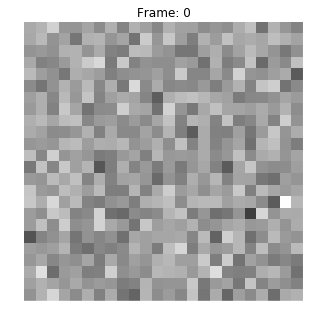

In [35]:
fig = plt.figure(figsize=(10,10))

range_data = frame_data[40:64,10:34,:]

def make_plot(Frame=0):
    fig = plt.figure(figsize=(5,5))
    current_frame = np.array(range_data[:,:,Frame])*conv_fact[40:64,10:34]
    plt.imshow(current_frame, interpolation='none', vmin=-350000, vmax=350000)
    ax = plt.gca()
    plt.axis('off')  # don't display plot axis
    ax.set_title("Frame: "+str(Frame))
    return HTML()  # slightly reduces flickering

plt.show()
        
interact(make_plot, Frame=(0, 54, 1))

Another way of accessing the data of a single sensor is by using the .get_sensor_signal() function of the frame_entity. 

To do so, one has to provide the x/y-coordinates of the sensor that will get analyzed, aswell as the range of indices that will be viewed as arguments to the **.get_sensor_signal(sensor_x, sensor_y, idx_start, edx_end)** function.

Additionally to guaranty a correct plot according to the time the data was gathered, the timestamp has to be added by calling **.get_frame_timestamps()** with the arguments **idx_start, idx_end** with the same values as the above call for the data.


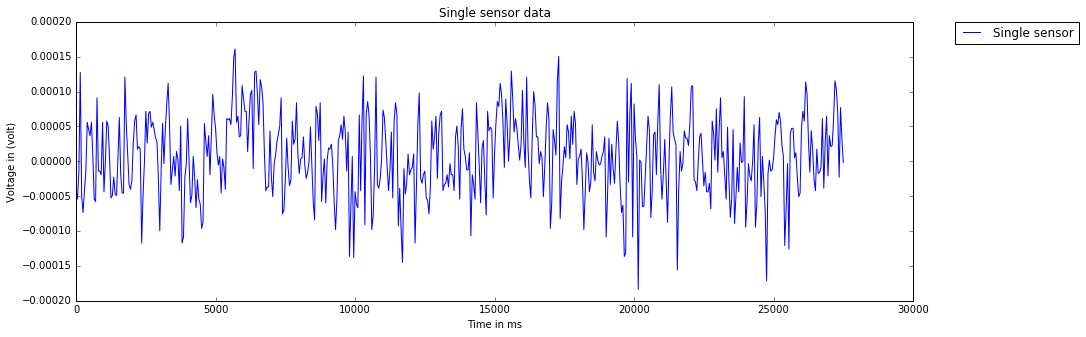

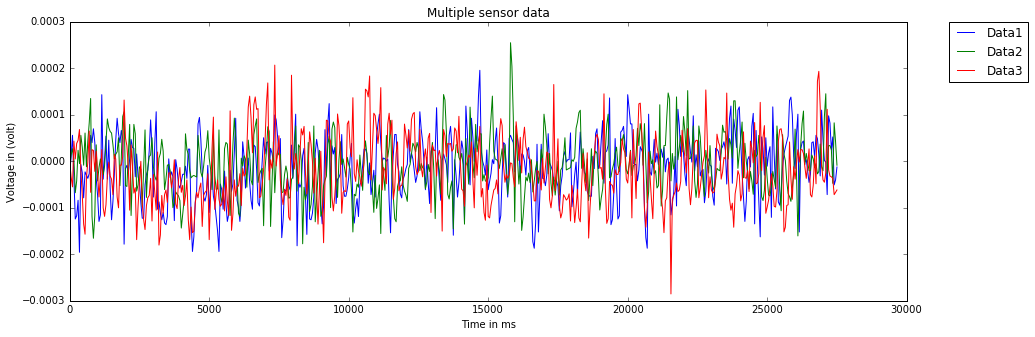

In [36]:
# Single sensor:
sensor_data = frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(42,7,0,550)
sensor_timestamps = frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_frame_timestamps(0,550)

fig = plt.figure(figsize=(15,5))
plt.plot(sensor_timestamps[0], sensor_data[0], label="Single sensor")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time in ms')
plt.ylabel('Voltage in (%s)' % sensor_data[1])
plt.title('Single sensor data')
plt.show()

# Multiple single sensors:
sensor_data1 = (frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(40,20,0,550),"Data1")
sensor_data2 = (frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(50,20,0,550),"Data2")
sensor_data3 = (frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(60,20,0,550),"Data3")

sensor_list = [sensor_data1 ,sensor_data2, sensor_data3]


fig = plt.figure(figsize=(15,5))

for sensor in xrange(3):
    plt.plot(sensor_timestamps[0], sensor_list[sensor][0][0],label = sensor_list[sensor][1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time in ms')
plt.ylabel('Voltage in (%s)' % sensor_data1[0][1])
plt.title('Multiple sensor data')
plt.show()

These plots can also be designed to be interactive:

<function __main__.single_plot>

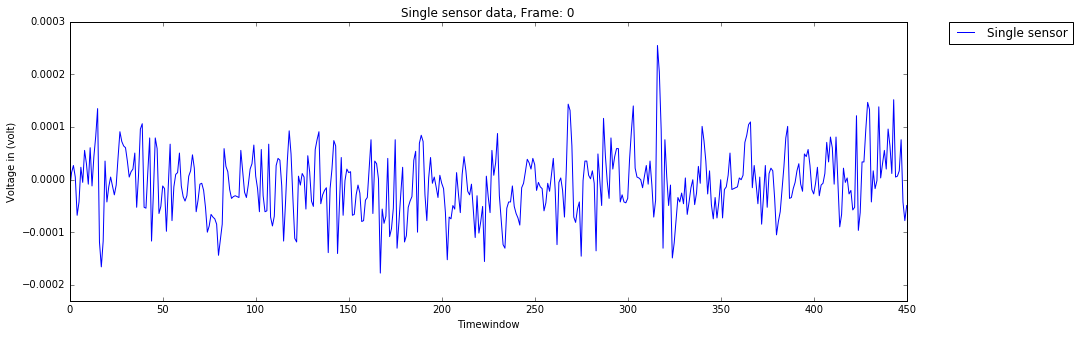

In [37]:
# Single sensor:
fig = plt.figure(figsize=(15,5))

def single_plot(Frame=0):
    fig = plt.figure(figsize=(15,5))
    sensor_data = frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(50,20,Frame,Frame+450)
    
    plt.plot(sensor_data[0], label="Single sensor")
    plt.ylim([-0.00023,0.0003])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Timewindow')
    plt.ylabel('Voltage in (%s)' % sensor_data[1])
    plt.title('Single sensor data, Frame: '+str(Frame))
    return HTML()  # slightly reduces flickering

plt.show()

interact(single_plot, Frame=(0, 550, 1))


If you happen to have one of our CMOS-MEA systems, feel free to check out our example client written in Python for the CMOS-MEA-Control software, to visualize your experiments in realtime from any PC in your network.

<a href='#Top'>Back to index</a>

### EventStream<a id='ES'></a>

EventStreams can be a wide array of events predefined by the user and stored in this stream. From the beginning/end or the duration of a treatment to periodically recurring stimuli this can be everything.

In [38]:
test_raw_data_file_path = ".\\TestData\\2014-07-09T10-17-35W8 Standard all 500 Hz.h5"

event_raw_data = McsPy.McsData.RawData(test_raw_data_file_path)

event_entity = event_raw_data.recordings[0].event_streams[0].event_entity[0]

print "EventEntity_0 contains: %s events" % event_entity.count
all_events = event_entity.get_events()
print
print "All events: ",all_events
print
print all_events[0][0]
print
all_event_timestamps = event_entity.get_event_timestamps()
print all_event_timestamps[0]
print
all_event_durations = event_entity.get_event_durations()
print all_event_durations[0]

(u'Recording_0', <HDF5 group "/Data/Recording_0" (4 members)>)
(u'Stream_0', <HDF5 group "/Data/Recording_0/EventStream/Stream_0" (2 members)>)
(u'EventEntity_0', <HDF5 dataset "EventEntity_0": shape (2, 12), type "<i8">)
(u'InfoEvent', <HDF5 dataset "InfoEvent": shape (1,), type "|V44">)
EventEntity_0 contains: 12 events

All events:  (array([[  216000,  1916000,  3616000,  5316000,  7016000,  8716000,
        10416000, 12116000, 13814000, 15514000, 17214000, 18914000],
       [       0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0]], dtype=int64), <Unit('microsecond')>)

[  216000  1916000  3616000  5316000  7016000  8716000 10416000 12116000
 13814000 15514000 17214000 18914000]

[  216000  1916000  3616000  5316000  7016000  8716000 10416000 12116000
 13814000 15514000 17214000 18914000]

[0 0 0 0 0 0 0 0 0 0 0 0]


More info with **.info.info**

In [39]:
print event_entity.info.info

{'EventID': 0, 'RawDataBytes': 4, 'RawDataType': 'Int', 'Label': '', 'SourceChannelLabels': '1                                         \r\n', 'SourceChannelIDs': '8', 'GroupID': 0}


Visualization of this information is best combined with other data-types to highlight the occurance of events.

Depending on the data these plots don't necessarily overlap.

First we get the data we want to plot. In this case the data from the AnalogStreams and the data from the TimestampStream is extracted.

In [40]:
stream1 = event_raw_data.recordings[0].analog_streams[0]
stream2 = event_raw_data.recordings[0].analog_streams[1]
channel_id = event_raw_data.recordings[0].analog_streams[1].channel_infos.keys()[0]
timestamps = event_raw_data.recordings[0].timestamp_streams[0].timestamp_entity[0].get_timestamps()[0]

time1 = stream1.get_channel_sample_timestamps(channel_id,0,3000)
signal1 = stream1.get_channel_in_range(channel_id,0,3000)
time2 = stream2.get_channel_sample_timestamps(channel_id,0,3000)
signal2 = stream2.get_channel_in_range(channel_id,0,3000)

(u'Stream_0', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_0" (3 members)>)
(u'ChannelData', <HDF5 dataset "ChannelData": shape (8, 9850), type "<i4">)
(u'ChannelDataTimeStamps', <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">)
(u'InfoChannel', <HDF5 dataset "InfoChannel": shape (8,), type "|V100">)
(u'Stream_1', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_1" (3 members)>)
(u'ChannelData', <HDF5 dataset "ChannelData": shape (8, 9800), type "<i4">)
(u'ChannelDataTimeStamps', <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">)
(u'InfoChannel', <HDF5 dataset "InfoChannel": shape (8,), type "|V100">)
(u'Stream_2', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_2" (3 members)>)
(u'ChannelData', <HDF5 dataset "ChannelData": shape (1, 9800), type "<i4">)
(u'ChannelDataTimeStamps', <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">)
(u'InfoChannel', <HDF5 dataset "InfoChannel": shape (1,), type "|V100">)
(u'Stream_0', <HDF5 group "/

Next we plot the AnalogStreams according to the Timestamps.

Then we add some vertical lines representing the Events.

Finally we define some plot properties and we are done.

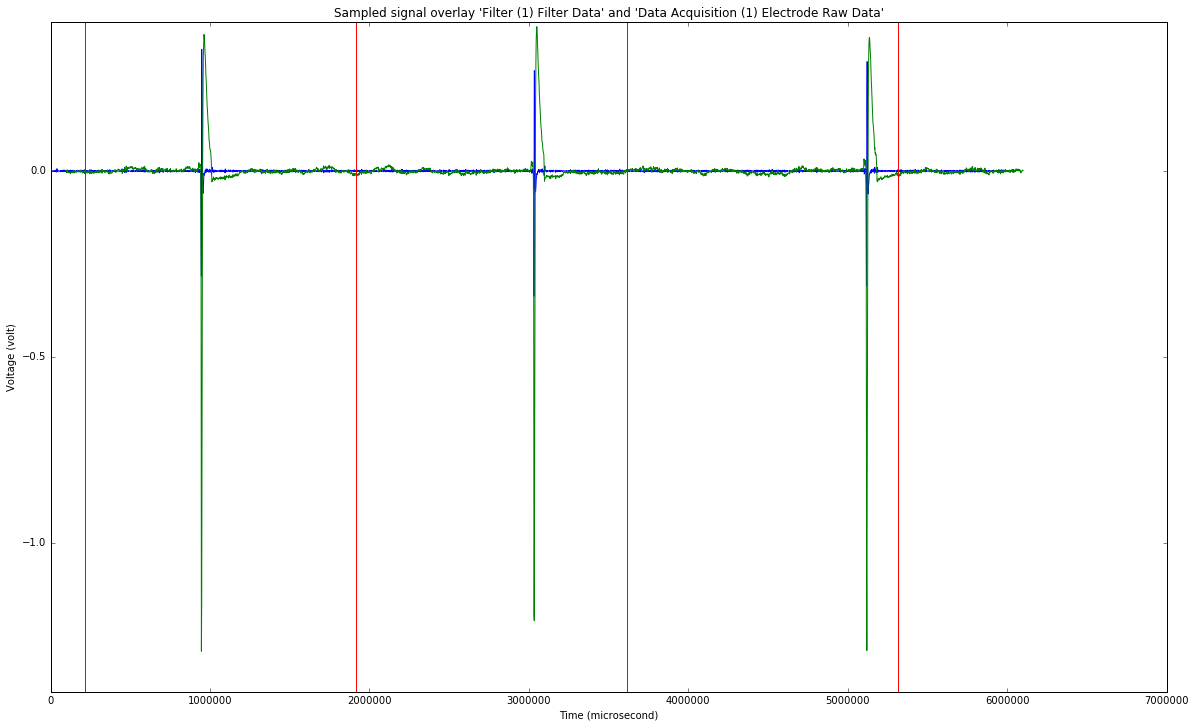

In [41]:
plt.figure(figsize=(20,12))
plt.plot(time1[0], signal1[0])
plt.plot(time2[0], signal2[0])
max_time = max(time1[0][-1],time2[0][-1])

for event in all_events[0][0]:
    if event < max_time:
        plt.axvline(event, color='r') 
        
plt.xlabel('Time (%s)' % time1[1])
plt.ylabel('Voltage (%s)' % signal1[1])
plt.title('Sampled signal overlay \'%s\' and \'%s\'' % (stream1.label, stream2.label))
plt.show()

<a href='#Top'>Back to index</a>

### SegmentStream<a id='SS'></a>

SegmentStreams are further split up into two subtypes:

- Cutouts: As the name already implies these bits of data are predefined cutouts of a certain dimension from the signal received by the electrodes.
- Averages: Are averages of those cutouts, for all cutouts at certain timepoints



```python
    python DataStreamInfo.py --f AnalogSegmentTimestamp.h5
```

#### Subtype: Cutouts<a id='SC'></a>

    Date                 Program    Version
    -------------------  ---------  ---------
    2014-07-25 11:30:56  MC_Rack    4.5.12.0

    Type       Stream    # ch
    ---------  --------  ------
    Analog               60
    Segment
    TimeStamp

For SegmentStreams you can extract a single entity by addressing its index.

So the first SegmentEntity at index 0 would be:

In [42]:
segment_raw_data = McsPy.McsData.RawData('.\\TestData\\AnalogSegmentTimestamp.h5')

first_segment_entity = segment_raw_data.recordings[0].segment_streams[0].segment_entity[0]

print
print "Segment entity 0 contains: %s segments" % first_segment_entity.segment_sample_count

(u'Recording_0', <HDF5 group "/Data/Recording_0" (3 members)>)
(u'Stream_0', <HDF5 group "/Data/Recording_0/SegmentStream/Stream_0" (122 members)>)
(u'InfoSegment', <HDF5 dataset "InfoSegment": shape (60,), type "|V48">)
(u'SegmentData_0', <HDF5 dataset "SegmentData_0": shape (75, 21), type "<i4">)
(u'SegmentData_1', <HDF5 dataset "SegmentData_1": shape (75, 21), type "<i4">)
(u'SegmentData_10', <HDF5 dataset "SegmentData_10": shape (75, 21), type "<i4">)
(u'SegmentData_11', <HDF5 dataset "SegmentData_11": shape (75, 21), type "<i4">)
(u'SegmentData_12', <HDF5 dataset "SegmentData_12": shape (75, 21), type "<i4">)
(u'SegmentData_13', <HDF5 dataset "SegmentData_13": shape (75, 21), type "<i4">)
(u'SegmentData_14', <HDF5 dataset "SegmentData_14": shape (75, 21), type "<i4">)
(u'SegmentData_15', <HDF5 dataset "SegmentData_15": shape (75, 21), type "<i4">)
(u'SegmentData_16', <HDF5 dataset "SegmentData_16": shape (75, 21), type "<i4">)
(u'SegmentData_17', <HDF5 dataset "SegmentData_17": sh

Again a full list of of entities to iterate over can be generated with **.keys**

In [43]:
segment_stream_keys = segment_raw_data.recordings[0].segment_streams[0].segment_entity.keys()

print segment_stream_keys

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


The data of one of these entities can either be accessed by **.data**, but several steps have to be applied for the data to make sense when plotted.

In [44]:
data = segment_raw_data.recordings[0].segment_streams[0].segment_entity[0].data

In [45]:
data = np.reshape(data, -1, 'F')
print len(data)

1575


In [46]:
scale = segment_raw_data.recordings[0].segment_streams[0].segment_entity[0].info.source_channel_of_segment[0].adc_step.magnitude
print scale

2.4993e-05


In [47]:
data = data * scale
plt.figure(figsize=(12,6))
bokeh.io.output_notebook()
plt.plot(data)
bokeh.plotting.show(bokeh.mpl.to_bokeh())

Loading BokehJS ...

**.data_ts** yields the corresponding timestamps of the segment entity but to be used together similar reformating has to be done.

As you can see the above steps are rather complicated. Therefor custom functions have been already implemented in **McsPy** to make your life easier: 

**get_segment_in_range()** 

and

**get_segment_sample_timestamps()**


With this built-in function one can select ranges of these segments included in the SegmentEntities. 

If you want to plot the included data to quickly visualize it you need two things:

1. the signal itself
2. the corresponding timestamp

For this we can use **get_segment_in_range()** and **get_segment_sample_timestamps()**. Arguments that can be passed are:

- **segment_id**: Id of the SegmentData within the Entity that will be analyzed
- **flat**: False will leave data dimensions unchanged, True will convert data into a one-dimensional vector of the sequentially ordered segments
- **idx_start**: Index of the first segment that should be returned. If left unspecified will be first possible index.
- **idx_end**: Index of the last segment that should be returned If left unspecified will be last possible index.


In [48]:
signal = first_segment_entity.get_segment_in_range(segment_id = 0, flat = True)

print signal[0]
print signal[1]

bokeh.io.output_notebook()

plt.figure(figsize=(12,6))
plt.plot(signal[0])

bokeh.plotting.show(bokeh.mpl.to_bokeh())

[ 0.0481865   0.06148278  0.07377934 ...,  0.58113724  0.57933774
  0.57763822]
volt


Loading BokehJS ...

The parameter **flat** needs to be set to True, so the data is **flattened** into a one-dimensional array and matplotlibs plot function can handle it.

Overlaying data from all segments might look like this:

In [49]:
bokeh.io.output_notebook()

plt.figure(figsize=(12,6))

signal_ts = first_segment_entity.get_segment_sample_timestamps(segment_id = 0, flat = True)

factor = ureg.convert(1, str(signal_ts[1]), "second")
signal_ts_second = signal_ts[0] * factor

for i in segment_raw_data.recordings[0].segment_streams[0].segment_entity.keys():
    
    signal = segment_raw_data.recordings[0].segment_streams[0].segment_entity[i].get_segment_in_range(segment_id = 0, flat = True)

    plt.plot(signal[0])

plt.xlabel('time (%s)' % ureg.s)
plt.ylabel('voltage (%s)' % signal[1])
plt.title('Sampled signal segments')

bokeh.plotting.show(bokeh.mpl.to_bokeh())

Loading BokehJS ...

#### Subtype: Averages <a id='SA'></a>

Averages are a convenient built-in way to get precalculated values for mean and standard deviation of a collection of predefineable sensors/timeframes.

Calling DataStreamInfo.py on AverageEvent.h5 reveals its content

    Date                 Program           Version
    -------------------  ----------------  ---------
    2015-04-02 16:04:26  Multiwell-Screen  1.2.1.0

    Type     Stream                              # ch
    -------  ----------------------------------  ------
    Event    Experiment State Changes_00 Atrium
    Event    Applied Dilution Series_00 Atrium
    Segment  Averages_00 Atrium
    
The file has three Streams: Two **EventStreams** which, in this case, hold information about state changes of the experiment aswell as applied dilutions and one **AverageStream**, in this case holding data from an experiment mith cardiac muscel cells. 

Data access looks like this:

In [50]:
average_raw_data = McsPy.McsData.RawData(".\\TestData\\AverageEvent.h5")

In [51]:
average_data = average_raw_data.recordings[0].segment_streams[0]

(u'Recording_0', <HDF5 group "/Data/Recording_0" (2 members)>)
(u'Stream_0', <HDF5 group "/Data/Recording_0/SegmentStream/Stream_0" (24 members)>)
(u'AverageData_18', <HDF5 dataset "AverageData_18": shape (2, 5100, 8), type "<i4">)
(u'AverageData_19', <HDF5 dataset "AverageData_19": shape (2, 5100, 8), type "<i4">)
(u'AverageData_21', <HDF5 dataset "AverageData_21": shape (2, 5100, 9), type "<i4">)
(u'AverageData_30', <HDF5 dataset "AverageData_30": shape (2, 5100, 9), type "<i4">)
(u'AverageData_31', <HDF5 dataset "AverageData_31": shape (2, 5100, 9), type "<i4">)
(u'AverageData_33', <HDF5 dataset "AverageData_33": shape (2, 5100, 7), type "<i4">)
(u'AverageData_38', <HDF5 dataset "AverageData_38": shape (2, 5100, 6), type "<i4">)
(u'AverageData_40', <HDF5 dataset "AverageData_40": shape (2, 5100, 6), type "<i4">)
(u'AverageData_42', <HDF5 dataset "AverageData_42": shape (2, 5100, 8), type "<i4">)
(u'AverageData_43', <HDF5 dataset "AverageData_43": shape (2, 5100, 8), type "<i4">)
(u'

As you can see the the entities are unconsecutavely numbered by id and not consecutively by index. To be able to iterate over all entities of the stream we have to get a list of indices.

By looking at how McsData.py accesses the HDF5 file we know that upon initialization of the stream a dictionary is created with IDs and values. With pythons **.keys()** we can create a list of all entity IDs.

In [52]:
id_list = average_data.segment_entity.keys()

id_list = sorted(id_list)

print id_list

[18, 19, 21, 30, 31, 33, 38, 40, 42, 43, 45]


Just like addressing FrameStreamEntities instead of an index we need to provide the ID of the entity, in this case one of the electrodes within a single well, we want to analyze. Let's pick 31 from the inedx_list we just generated.

In [53]:
average_data_31 = average_raw_data.recordings[0].segment_streams[0].segment_entity[31].data

print average_data_31


<HDF5 dataset "AverageData_31": shape (2, 5100, 9), type "<i4">


When looking at the data with HDFView 2.11 we see how the data is aranged within the file. It has 2 rows, row 0 holds the mean values and row 2 holds the values for standard deviation, 5100 columns representing timpoints of measurement, and 9 sheets, in this case representing different treatments.

So to get the mean values(index 0), all of them (index 0 to intex 5100) of the first treatment(index 0) and plot these:

<function matplotlib.pyplot.show>

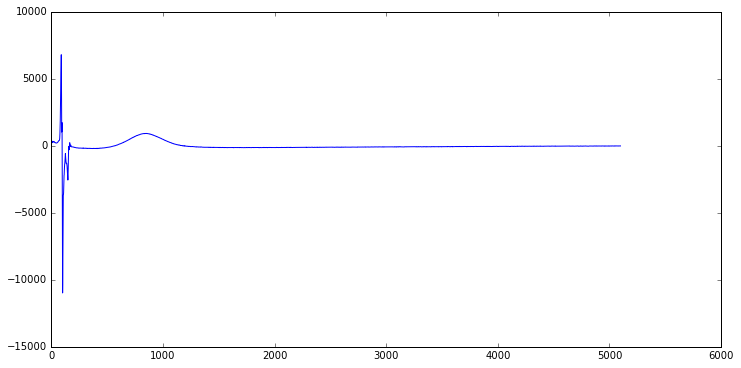

In [54]:
plt.figure(figsize=(12,6))

plt.plot(average_data_31[0,0:5100,0])

plt.show

Plotting all 9 treatments/sheets could look like this:

In [55]:
import bokeh.io
import bokeh.mpl
import bokeh.plotting

bokeh.io.output_notebook()

plt.figure(figsize=(12,6))
color = iter(plt.cm.jet(np.linspace(0,1,9))) # generate as many distinct colors as there are lines that will be plotted
                                             # you can replace jet with cool or winter or any other matplotlib colormap
for sheet in xrange(9):
    labelText = "Data_"+str(sheet)
    c = next(color)  # select color from custom colormap
    plt.plot(average_data_31[0,:5100,sheet], c = c, label = labelText)  # plot line with it's own color

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

bokeh.plotting.show(bokeh.mpl.to_bokeh())

Loading BokehJS ...

C:\Program Files\Python\Anaconda2\lib\site-packages\bokeh\core\compat\mplexporter\exporter.py:171: UserWarning: Legend element Line2D(Data_0) not implemented
  warnings.warn("Legend element %s not implemented" % child)
C:\Program Files\Python\Anaconda2\lib\site-packages\bokeh\core\compat\mplexporter\exporter.py:171: UserWarning: Legend element Line2D(Data_1) not implemented
  warnings.warn("Legend element %s not implemented" % child)
C:\Program Files\Python\Anaconda2\lib\site-packages\bokeh\core\compat\mplexporter\exporter.py:171: UserWarning: Legend element Line2D(Data_2) not implemented
  warnings.warn("Legend element %s not implemented" % child)
C:\Program Files\Python\Anaconda2\lib\site-packages\bokeh\core\compat\mplexporter\exporter.py:171: UserWarning: Legend element Line2D(Data_3) not implemented
  warnings.warn("Legend element %s not implemented" % child)
C:\Program Files\Python\Anaconda2\lib\site-packages\bokeh\core\compat\mplexporter\exporter.py:171: UserWarning: Legend eleme

Plotting the data from all sensors might look like this

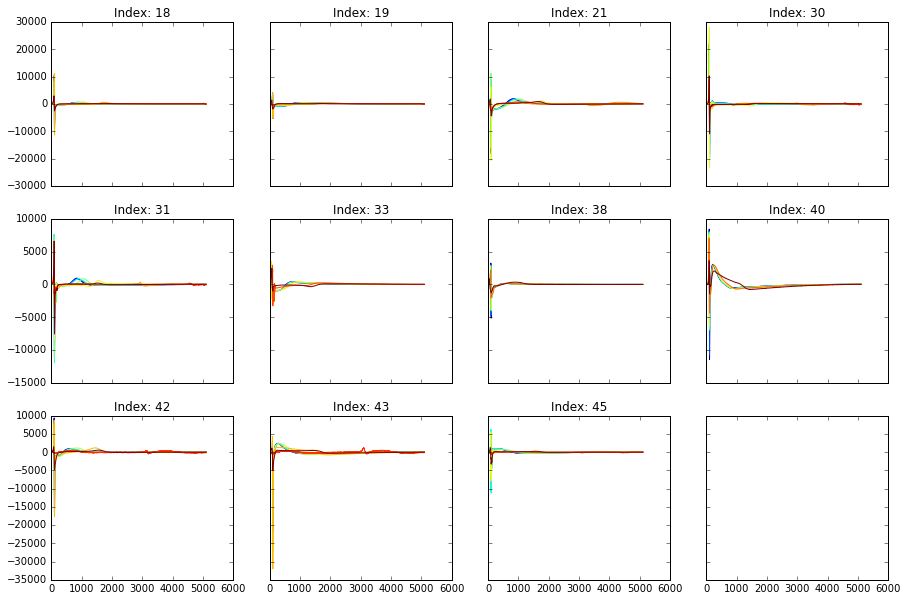

In [56]:
# index_list: see above

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, sharex='col', sharey='row')
fig.set_size_inches(6,6)
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

fig.set_size_inches(15,10)

for i in xrange(len(ax_list)-1):
    x = average_raw_data.recordings[0].segment_streams[0].segment_entity[id_list[i]].data.shape[2]
    color = iter(plt.cm.jet(np.linspace(0,1,x))) # generate as many distinct colors as there are lines that will be plotted
                                                 # you can replace jet with cool or winter or any other matplotlib colormap
    for k in xrange(x):
            current_average = average_raw_data.recordings[0].segment_streams[0].segment_entity[id_list[i]].data[0,:5100,k]
            c = next(color)  # select color from custom colormap
            ax_list[i].plot(current_average, c = c)
            ax_list[i].set_title("Index: "+str(id_list[i]))
plt.show()

<a href='#Top'>Back to index</a>

### TimestampStream <a id='TS'></a>

As you might have noticed some of the plots already accessed the according timestamps. Depending on your settings these may stand for beginnings and/or ends of certain events.

Accessing the data within a TimestampStream is achieved by calling the **.get_timestamps()** function of a **.timestamp_entity** within **.timestamp_streams**:

In [57]:
timestamps_raw_data = McsPy.McsData.RawData('.\\TestData\\2014-07-09T10-17-35W8 Standard all 500 Hz.h5')

In [58]:
timestamps = timestamps_raw_data.recordings[0].timestamp_streams[0].timestamp_entity[0].get_timestamps()
print

# Array of everything concerning the timestamps of the entity
print timestamps
print

# Just the timestamps
print "Timestamps: ", timestamps[0][0]
print

# The unit the values are in
print "Unit: ", timestamps[1]

(u'Recording_0', <HDF5 group "/Data/Recording_0" (4 members)>)
(u'Stream_0', <HDF5 group "/Data/Recording_0/TimeStampStream/Stream_0" (9 members)>)
(u'InfoTimeStamp', <HDF5 dataset "InfoTimeStamp": shape (8,), type "|V44">)
(u'TimeStampEntity_0', <HDF5 dataset "TimeStampEntity_0": shape (1, 26), type "<i8">)
(u'TimeStampEntity_1', <HDF5 dataset "TimeStampEntity_1": shape (1, 23), type "<i8">)
(u'TimeStampEntity_2', <HDF5 dataset "TimeStampEntity_2": shape (1, 30), type "<i8">)
(u'TimeStampEntity_3', <HDF5 dataset "TimeStampEntity_3": shape (1, 33), type "<i8">)
(u'TimeStampEntity_4', <HDF5 dataset "TimeStampEntity_4": shape (1, 29), type "<i8">)
(u'TimeStampEntity_5', <HDF5 dataset "TimeStampEntity_5": shape (1, 28), type "<i8">)
(u'TimeStampEntity_6', <HDF5 dataset "TimeStampEntity_6": shape (1, 29), type "<i8">)
(u'TimeStampEntity_7', <HDF5 dataset "TimeStampEntity_7": shape (1, 26), type "<i8">)

(array([[  944000,   954000,   964000,  3030000,  3040000,  3052000,
         3096000, 

To illustrate how these data might be used for visualization purposses we can plot these together with some data from the AnalogStream.

We will use the built-in functions **.get_channel_in_range()** and **.get_channel_sample_timestamps()**

[[  944000   954000   964000  3030000  3040000  3052000  3096000  5104000
   5116000  5126000  7204000  7212000  7226000  9290000  9298000 11376000
  11386000 11442000 13462000 13472000 13528000 15548000 15558000 17634000
  17644000 17686000]]
Time1 (array([      0,    2000,    4000, ..., 5996000, 5998000, 6000000], dtype=int64), <Unit('microsecond')>)
Tiem2 (array([ 100000,  102000,  104000, ..., 6096000, 6098000, 6100000], dtype=int64), <Unit('microsecond')>)


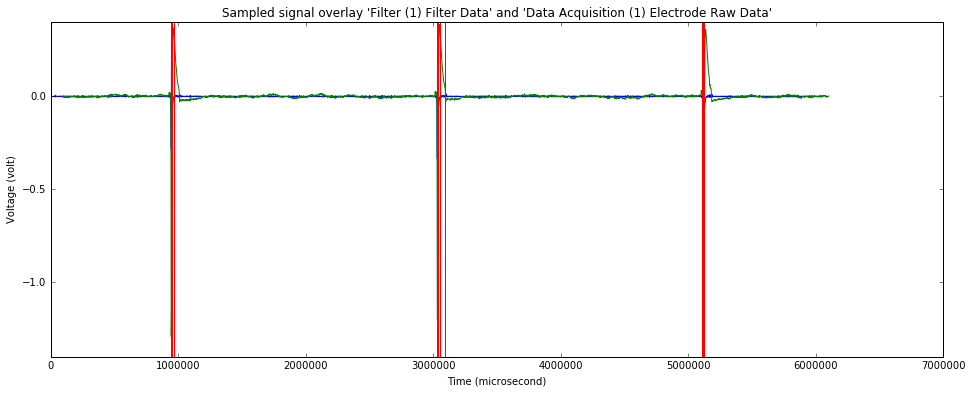

In [59]:
stream1 = event_raw_data.recordings[0].analog_streams[0]
stream2 = event_raw_data.recordings[0].analog_streams[1]
channel_id = event_raw_data.recordings[0].analog_streams[1].channel_infos.keys()[0]
timestamps = event_raw_data.recordings[0].timestamp_streams[0].timestamp_entity[0].get_timestamps()[0]
print timestamps

time1 = stream1.get_channel_sample_timestamps(channel_id,0,3000)
print "Time1",time1
signal1 = stream1.get_channel_in_range(channel_id,0,3000)
time2 = stream2.get_channel_sample_timestamps(channel_id,0,3000)
print "Tiem2",time2
signal2 = stream2.get_channel_in_range(channel_id,0,3000)

plt.figure(figsize=(16,6))
plt.plot(time1[0], signal1[0])
plt.plot(time2[0], signal2[0])
max_time = max(time1[0][-1],time2[0][-1])

[plt.axvline(timestamp, color='r') for timestamp in timestamps[0,:] if timestamp < max_time]

plt.xlabel('Time (%s)' % time1[1])
plt.ylabel('Voltage (%s)' % signal1[1])
plt.title('Sampled signal overlay \'%s\' and \'%s\'' % (stream1.label, stream2.label))

<a href='#Top'>Back to index</a>

## Info <a id='I2'></a>

As depicted in the graphical representation of the class structure of the McsData.py module, every stream has an info file associated with it which holds additional information about the data included in the entities of those streams. This additional information can be used for simpler tasks like labeling axes with units stored in the info file or to sort streams according to parameters which are deposited in this kind of file.

Below you find a collection of commands to access the data of the info files.

#### Accessing AnalogStream Info:

In [60]:
print channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].info

{'HighPassFilterCutOffFrequency': '-1', 'Exponent': -9, 'LowPassFilterType': '', 'LowPassFilterOrder': -1, 'RowIndex': 0, 'RawDataType': 'Int', 'ChannelID': 0, 'LowPassFilterCutOffFrequency': '-1', 'Label': 'E1', 'HighPassFilterOrder': -1, 'HighPassFilterType': '', 'ADZero': 0, 'ConversionFactor': 381470, 'Tick': 2000, 'GroupID': 0, 'Unit': 'V'}


In [61]:
print channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].info['ConversionFactor']

381470


As you can see the data is aranged in a dictionary, so we can geta all the keys with **.keys()**

In [62]:
info_keys = channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].info.keys()

print info_keys

['HighPassFilterCutOffFrequency', 'Exponent', 'LowPassFilterType', 'LowPassFilterOrder', 'RowIndex', 'RawDataType', 'ChannelID', 'LowPassFilterCutOffFrequency', 'Label', 'HighPassFilterOrder', 'HighPassFilterType', 'ADZero', 'ConversionFactor', 'Tick', 'GroupID', 'Unit']


And we can use this list to iterate over it.

In [63]:
for key in info_keys:
    print "Key:",key,", Value:",channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].info[key]

Key: HighPassFilterCutOffFrequency , Value: -1
Key: Exponent , Value: -9
Key: LowPassFilterType , Value: 
Key: LowPassFilterOrder , Value: -1
Key: RowIndex , Value: 0
Key: RawDataType , Value: Int
Key: ChannelID , Value: 0
Key: LowPassFilterCutOffFrequency , Value: -1
Key: Label , Value: E1
Key: HighPassFilterOrder , Value: -1
Key: HighPassFilterType , Value: 
Key: ADZero , Value: 0
Key: ConversionFactor , Value: 381470
Key: Tick , Value: 2000
Key: GroupID , Value: 0
Key: Unit , Value: V


For AnalogStreams there are some built-in functions you can call on **.channel_infos[index]**. 

- **.adc_step**
- **.channel_id**
- **.row_index**
- **.version**


If sampled data is enclosed in the AnalogStream

- **.sampling_frequency**
- **.sampling_tick**

can be used.

In [64]:
print channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].sampling_frequency

500.0 hertz


For Entities **.info.info** reveales additional info.

#### Accessing FrameStream Info:

In [65]:
print frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info

{'FrameLeft': 1, 'Exponent': -9, 'RawDataType': 'Short', 'LowPassFilterCutOffFrequency': '-1', 'Label': 'ROI 1', 'FrameTop': 1, 'ADZero': 0, 'LowPassFilterOrder': -1, 'ReferenceFrameTop': 1, 'FrameRight': 65, 'HighPassFilterType': '', 'Tick': 50, 'SensorSpacing': 1, 'HighPassFilterCutOffFrequency': '-1', 'FrameDataID': 0, 'ADCBits': 16, 'FrameID': 1, 'GroupID': 1, 'ReferenceFrameRight': 65, 'ReferenceFrameBottom': 65, 'LowPassFilterType': '', 'HighPassFilterOrder': -1, 'ReferenceFrameLeft': 1, 'FrameBottom': 65, 'Unit': 'V'}


In [66]:
print frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info['RawDataType']

Short


In addition there are:

- **.info.frame_id**
- **.info.sensor_spacing**
- **.info.adc_basic_step**
- **.info.adc_step_for_sensor(x, y)** x,y are the coordinates of the sensor. Sensor 1 has (0, 0) sensor 4225 has (65, 65)

In [67]:
print frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.adc_step_for_sensor(0,0)

1.125e-06 volt


#### Accessing EventStream Info:

In [68]:
print event_raw_data.recordings[0].event_streams[0].event_entity[0].info.info

{'EventID': 0, 'RawDataBytes': 4, 'RawDataType': 'Int', 'Label': '', 'SourceChannelLabels': '1                                         \r\n', 'SourceChannelIDs': '8', 'GroupID': 0}


In [69]:
print event_raw_data.recordings[0].event_streams[0].event_entity[0].info.info['SourceChannelIDs']

8


For EventStreams additionly there are 

- **.info.id**
- **.info.raw_data_bytes**
- **.info.source_channel_ids**
- **.info.source_channel_labels**
- **.info.version** 

#### Accessing SegmentStream Info:

In [70]:
print average_raw_data.recordings[0].segment_streams[0].segment_entity[31].info.info

{'SegmentID': 31, 'Label': 'Avg_31', 'PreInterval': 10000, 'SegmentType': 'Average', 'PostInterval': 500000, 'SourceChannelIDs': '31', 'GroupID': 2}


In [71]:
print average_raw_data.recordings[0].segment_streams[0].segment_entity[31].info.label

Avg_31


In [72]:
print average_raw_data.recordings[0].segment_streams[0].segment_entity[31].info.info['Label']

Avg_31


For Segments there also are:

- **.info.count**
- **.info.id**
- **.info.post_interval**
- **.info.pre_interval**
- **.info.type**
- **.info.version**

This holds true for cutout and average data alike.

For entities with averages you can use

- **.number_of_averages**
- **.sample_length**
- **.time_ranges**
- **.time_range(index)**
- **.average_counts**
- **.average_count(index)**
- **.segment_sample_count**

In [73]:
print average_raw_data.recordings[0].segment_streams[0].segment_entity[31].number_of_averages


9


#### Accessing TimestampStream Info:

In [74]:
print timestamps_raw_data.recordings[0].timestamp_streams[0].timestamp_entity[0].info.info

{'TimeStampEntityID': 0, 'Exponent': -6, 'Label': '', 'SourceChannelLabels': 'E1                                        \r\n', 'SourceChannelIDs': '0', 'GroupID': 0, 'Unit': 's'}


And last but not least Timestamps have: 

- **.info.data_type**
- **.info.exponent**
- **.info.id**
- **.info.measuring_unit**
- **.info.source_channel_ids**
- **.info.source_channel_labels**
- **.info.unit**
- **.info.version**

<a href='#Top'>Back to index</a>

## Accessing your Data with McsCMOS<a id='Accessing your Data with McsCMOS'></a> (under construction)


The classes included in the McsCMOS module were designed to allow easy access of HDF5 files containing CMOS data.

Namely there are 3 classe:
 - CMOSData <a id='CMOSData'></a>
 - CMOSConvProxy
 - CMOSSpike
 
Basically it's another way to obtain FrameStream data but with added functionality.

This is achieved through internel calls to predefined regions of the HDF5 file, as the CMOS systems only yield certain types of data.

Where you had to call:

    frame_data = McsPy.McsData.RawData.recordings[0].frame_streams[0].frame_entity[1].data(file_path)
    
most of this is internalized and the reduced call looks like:


In [75]:
rawdata_path = ".\\TestData\\CMOSTestRec.h5"

CMOS_data = McsPy.McsCMOS.CMOSData('.\\TestData\\Retina.h5')

print CMOS_data.raw_data

<HDF5 dataset "FrameData": shape (65, 65, 20000), type "<i2">


This Data can be handled as demonstrated in the <a href='#FrameStream'>FrameStream</a> example before.

CMOSSpike can be used to get spike related data out of the HDF5 file.

In [76]:
CMOS_spikes = McsPy.McsCMOS.CMOSSpikes(rawdata_path)

print CMOS_spikes

NameError: global name 'CMOSSpikeFile' is not defined

<a href='#Top'>Back to index</a>